# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

- Perform Exploratory Data Analysis
- Normalize the data
- Calculate daily returns
- Data visualization using Matplotlib and PlotLy
- Find correlation between the daily returns of each stock

 # TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

In [3]:
# Read the files
stocks_df = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)

In [4]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by=['Date'])

In [5]:
stocks_df.columns

Index(['FB', 'TWTR', 'NFLX'], dtype='object')

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
# Checking null values
stocks_df.isnull().sum()

FB      0
TWTR    0
NFLX    0
dtype: int64

In [7]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1712 entries, 2013-11-07 to 2020-08-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      1712 non-null   float64
 1   TWTR    1712 non-null   float64
 2   NFLX    1712 non-null   float64
dtypes: float64(3)
memory usage: 53.5 KB


In [8]:
# Print the number of stocks
len(stocks_df.columns)

3

- What is the average price of facebook?
- Which stock has the minimum dispersion from the mean in dollar value?
- What is the maximum price for Netflix stock over the specified time period?
- Hint: Try this out: stocks_df.describe() 

In [9]:
stocks_df['FB'].mean()

136.96699175467293

In [10]:
print(stocks_df['FB'].std())
print(stocks_df['TWTR'].std())
print(stocks_df['NFLX'].std())

51.17733646828972
11.483346626158704
129.76500499702573


Minimum dispersion from mean - Twitter (Std Dev = 11.48)

In [11]:
print('Max price of Netflix =',stocks_df['NFLX'].max())

Max price of Netflix = 548.72998


In [12]:
stocks_df.describe()

FB         TWTR         NFLX
count  1712.000000  1712.000000  1712.000000
mean    136.966992    31.352909   197.657978
std      51.177336    11.483347   129.765005
min      44.820000    14.010000    44.887142
25%      89.122500    19.639999    90.689999
50%     137.824997    31.720000   144.245002
75%     178.407501    38.315001   322.102493
max     303.910004    73.309998   548.729980

# TASK #4: PERFORM BASIC DATA VISUALIZATION

In [13]:
stocks_df

FB       TWTR        NFLX
Date                                         
2013-11-07   47.560001  44.900002   46.694286
2013-11-08   47.529999  41.650002   47.842857
2013-11-11   46.200001  42.900002   48.272858
2013-11-12   46.610001  41.900002   47.675713
2013-11-13   48.709999  42.599998   47.897144
...                ...        ...         ...
2020-08-20  269.010010  38.959999  497.899994
2020-08-21  267.010010  39.259998  492.309998
2020-08-24  271.390015  40.490002  488.809998
2020-08-25  280.820007  40.549999  490.579987
2020-08-26  303.910004  41.080002  547.530029

[1712 rows x 3 columns]

In [14]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def show_plot(df,title):
    df.plot(figsize=(15,8),title=title)
    plt.grid()
    plt.ylabel('Price')
    plt.show()

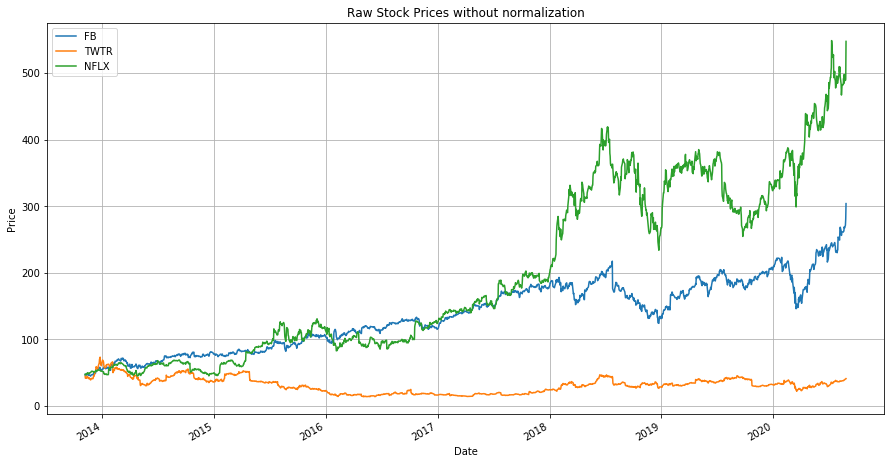

In [15]:
# Plot the data
show_plot(stocks_df, 'Raw Stock Prices without normalization')

MINI CHALLENGE #3:
- Let's assume that we want to normalize our stock prices data, what should we do?
- Print out normalized (scaled) stock prices 
- Notice the change in scale

In [16]:
def normalize(stocks_df):
    x = stocks_df.copy()
# Loop through each stock (while ignoring time columns with index 0)
    for i in x.columns:
        x[i] = x[i]/x[i][0]
    return x

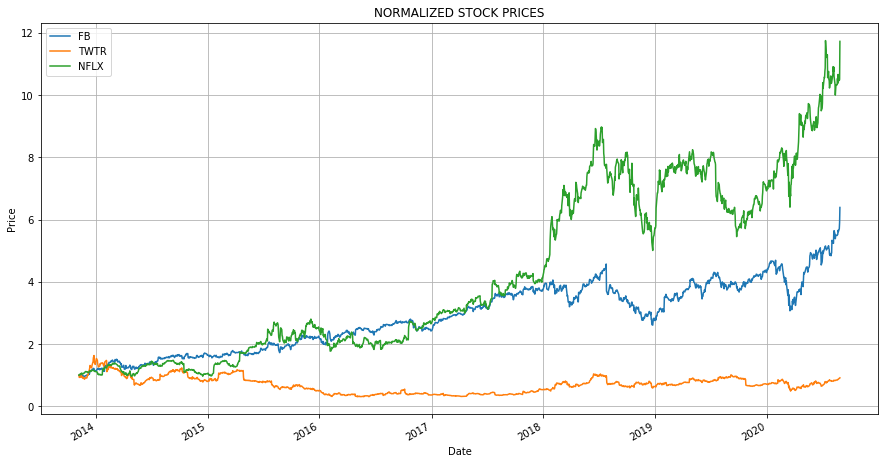

In [17]:
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

# TASK #5: PERFORM INTERACTIVE DATA VISUALIZATION 

In [18]:
# Function to plot interative plot plot
def interactive_plot(df,title):
    fig = px.line(title=title)
    for i in df.columns:
        fig.add_scatter(x=df.index,y=df[i],name=i)
    fig.show()

In [19]:
# Plot interactive chart
interactive_plot(stocks_df,'Interactive plot')

MINI CHALLENGE #4:
- Plot normalized stock data in an interactive way
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

In [20]:
interactive_plot(normalize(stocks_df), 'Normalized Prices')
# Facebook stock dropped from $209.78 on Jan 2nd, 2020 to $146.01 by March 16th, 2020 
# Net loss = $209.78 - $146.01 = $63.77 * 1000 = $63770

# TASK #6: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [21]:
stocks_data = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)
df_daily_return = stocks_data.pct_change()

In [22]:
df_daily_return

FB      TWTR      NFLX
Date                                    
2013-11-07       NaN       NaN       NaN
2013-11-08 -0.000631 -0.072383  0.024598
2013-11-11 -0.027982  0.030012  0.008988
2013-11-12  0.008874 -0.023310 -0.012370
2013-11-13  0.045055  0.016706  0.004645
...              ...       ...       ...
2020-08-20  0.024449  0.001800  0.027594
2020-08-21 -0.007435  0.007700 -0.011227
2020-08-24  0.016404  0.031330 -0.007109
2020-08-25  0.034747  0.001482  0.003621
2020-08-26  0.082223  0.013070  0.116087

[1712 rows x 3 columns]

# TASK #7: PLOT MULTIPLE STOCKS DAILY RETURNS

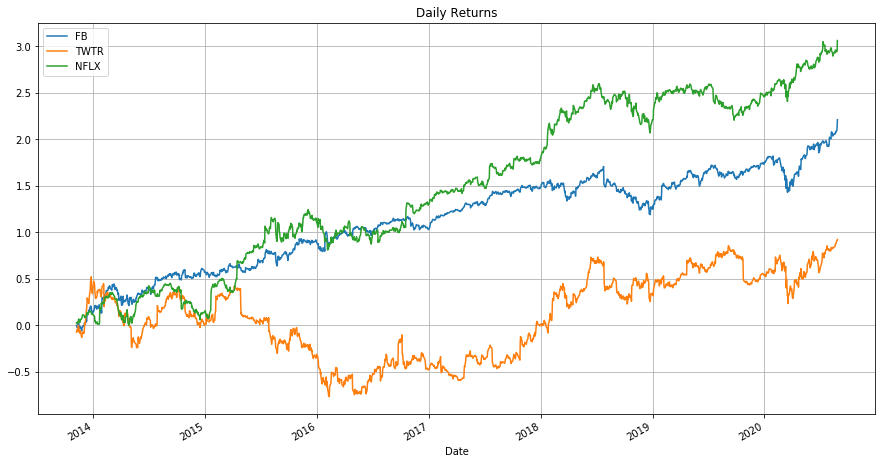

In [23]:
# Plot the daily returns
df_daily_return.cumsum().plot(figsize=(15,8),title='Daily Returns')
plt.grid()
plt.show()

In [24]:
interactive_plot(df_daily_return.cumsum(), 'Interactive Plot for Daily Returns')

MINI CHALLENGE #6:
- What is the maximum daily return in % values

In [25]:
df_daily_return.describe()

FB         TWTR         NFLX
count  1711.000000  1711.000000  1711.000000
mean      0.001292     0.000540     0.001790
std       0.020344     0.034131     0.026562
min      -0.189609    -0.241625    -0.193696
25%      -0.007929    -0.014370    -0.011224
50%       0.001248     0.000878     0.000459
75%       0.011293     0.015060     0.014718
max       0.155214     0.214171     0.190281

# TASK #8: ANALYZE DAILY RETURNS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263A8182C48>,
      dtype=object)

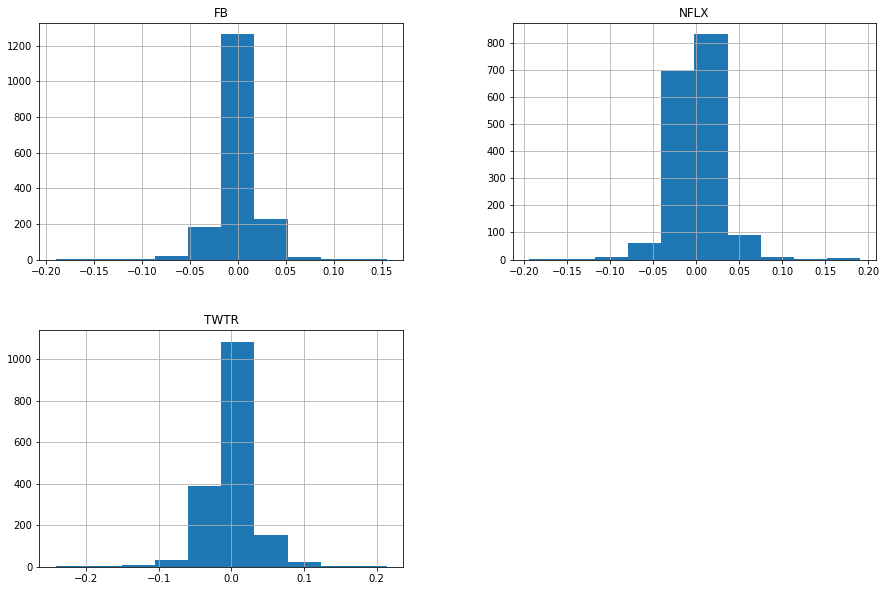

In [26]:
# Histogram of daily returns
df_daily_return.hist(figsize=(15,10),bins=10)

In [27]:
df_hist = df_daily_return.copy()
df_hist.reset_index(drop=True, inplace=True)

In [28]:
#Removing NaN Row
df_hist = df_hist.iloc[1:]

In [29]:
df_hist

FB      TWTR      NFLX
1    -0.000631 -0.072383  0.024598
2    -0.027982  0.030012  0.008988
3     0.008874 -0.023310 -0.012370
4     0.045055  0.016706  0.004645
5     0.005748  0.049061  0.021743
...        ...       ...       ...
1707  0.024449  0.001800  0.027594
1708 -0.007435  0.007700 -0.011227
1709  0.016404  0.031330 -0.007109
1710  0.034747  0.001482  0.003621
1711  0.082223  0.013070  0.116087

[1711 rows x 3 columns]

In [30]:
#Creating empty list for storing values of df_hist dataframe
data = []

In [31]:
#Appending values of df_hist to data
for i in df_hist.columns:
    data.append(df_daily_return[i].values)

In [32]:
#Converting list to numpy array
data = np.array(data)

In [33]:
print(data)

[[        nan -0.00063082 -0.02798229 ...  0.0164039   0.03474701
   0.08222348]
 [        nan -0.07238307  0.030012   ...  0.0313297   0.00148177
   0.01307036]
 [        nan  0.02459768  0.00898778 ... -0.00710934  0.00362102
   0.11608717]]


In [34]:
#Removing NaN values from numpy array
data = data[:, ~np.isnan(data).any(axis=0)]

In [35]:
print(data)

[[-0.00063082 -0.02798229  0.00887446 ...  0.0164039   0.03474701
   0.08222348]
 [-0.07238307  0.030012   -0.02331002 ...  0.0313297   0.00148177
   0.01307036]
 [ 0.02459768  0.00898778 -0.0123702  ... -0.00710934  0.00362102
   0.11608717]]


### The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution -pythonbasics.org › seaborn-distplot

In [36]:
# Create distplot with custom bin_size
#Using figure factory to create distplot
fig = ff.create_distplot(data, df_hist.columns, bin_size=0.02)
fig.show()

MINI CHALLENGE #7:
- Calculate the correlation matrix for the stocks daily return and comment on your answer

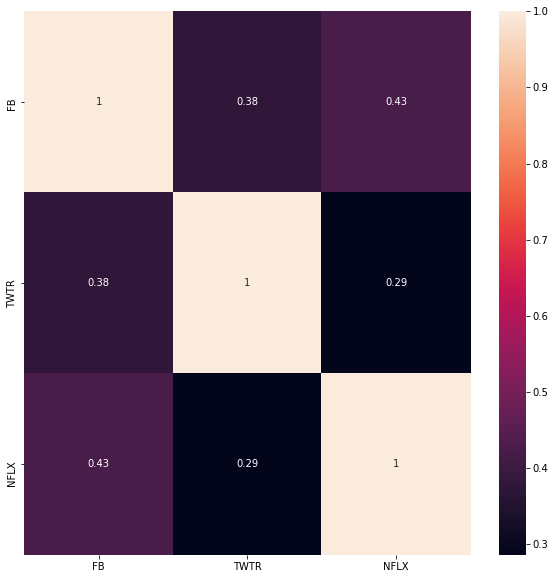

In [37]:
cm = df_daily_return.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)